In [1]:
# library import
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import imageio
import itertools
import statistics
from PIL import Image
from tqdm import tqdm
from scipy import spatial
import sklearn.feature_extraction
from mpl_toolkits import mplot3d
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# setting dimension reduction size (100 used)
img_dim = 100

In [3]:
# loading image of interest and resizing it
orignal_image = Image.open('./images/img.png')
im_resize = orignal_image.resize((img_dim, img_dim))
# saving resizesed image and loading it again (so we could keep track of changes)
im_resize.save("./images/img_square.png")
test_image = imageio.imread('./images/img_square.png')

(40, 40)


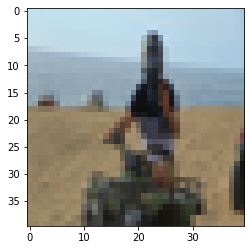

In [7]:
plt.imshow(im_resize)

In [15]:
# loading image of interest and resizing it
test_image = Image.open('./images/img.png')
print(test_image.size)

# saving resizesed image and loading it again (so we could keep track of changes)
# 100 x 100 image used for final
im_resize = test_image.resize((100,100))
im_resize.save("./images/img_square.png")
test_image = imageio.imread('./images/img_square.png')

(1713, 859)


In [138]:
# loading image of interest and resizing it
test_image_small = Image.open('./images/img.png')
print(test_image_small.size)

# saving resizesed image and loading it again (so we could keep track of changes)
# 50 x 50 image used for 'every movie ever part'
im_resize_small = test_image_small.resize((50,50))
im_resize_small.save("./images/img_square_small.png")
test_image_small = imageio.imread('./images/img_square_small.png')

(1713, 859)


In [139]:
# for 100x100 image
# creating RGB matricies and normalizing on 0-1
red_img = test_image[:,:,0]/255
green_img = test_image[:,:,1]/255
blue_img = test_image[:,:,2]/255

# setting image reshape to test image
img_reshape = np.zeros(test_image.shape)
img_reshape[:,:,0] = red_img
img_reshape[:,:,1] = green_img
img_reshape[:,:,2] = blue_img
print(img_reshape.shape)

# for 50x50 image
# creating RGB matricies and normalizing on 0-1
red_img_small = test_image_small[:,:,0]/255
green_img_small = test_image_small[:,:,1]/255
blue_img_small = test_image_small[:,:,2]/255

# setting image reshape to test image
img_reshape_small = np.zeros(test_image_small.shape)
img_reshape_small[:,:,0] = red_img_small
img_reshape_small[:,:,1] = green_img_small
img_reshape_small[:,:,2] = blue_img_small
print(img_reshape_small.shape)

(100, 100, 3)
(50, 50, 3)


In [140]:
# generate adjacency matrix from image and drop off (d) in paper
def get_adj_matrix(img, ajd_val):
    # initialize counter
    counter = 0
    # get a copy of the image
    helper = img[:,:,1].copy()
    for (x,y) in np.ndenumerate(helper):
        counter += 1
        # populate values of copy with unique values
        helper[x[0],x[1]] = counter
    
    # get adjecency matrix from image using img_to_graph and set to array
    img_graph = sklearn.feature_extraction.image.img_to_graph(helper, mask=None).toarray()
    img_graph = np.asarray(img_graph, dtype = np.float64)
    # set the diagnoals to 0 (no self looping)
    np.fill_diagonal(img_graph, 0)
    # change the values of the adacency graph to the drop off value
    img_graph[img_graph > 0] = ajd_val
    img_graph = np.asmatrix(img_graph)
    # return adjecency matrix
    return img_graph

# standardize the matrix so that the sum of each row adds to 1
def std_matrix(mat):
    count = 0
    # set diagonal to 0
    np.fill_diagonal(mat, 0)
    # get copy of the matrix
    matrix = mat.copy()
    # for any i value in row in matrix set the value to its value/ the sum of all values in that row
    for i in mat:
        matrix[count] = i/i.sum()
        count+=1
    # set diagnol to 0 again just in case
    np.fill_diagonal(matrix, 0)
    return matrix
    
# given a matrix and a depth (number of neighbor steps to consider (n from paper))
# return an adjecency matrix of all connected within that number of steps
def adj_depth(mat, depth):
    # initalize values
    B = 0
    C = 0
    C = mat.copy()
    # loop through number of neigbors
    for i in range(depth):
        print(i)
        # multiply the original adjecency matrix by the running total adjecency matrix
        C = C*mat
        B += C
    # sum matricies so that they include all previous steps too
    B = B+mat
    return B

In [ ]:
# generate adjacency matrix from image and drop off (d) in paper
def get_adj_matrix(img, ajd_val):
    # initialize counter
    counter = 0
    # get a copy of the image
    helper = img[:,:,1].copy()
    for (x,y) in np.ndenumerate(helper):
        counter += 1
        # populate values of copy with unique values
        helper[x[0],x[1]] = counter
    
    # get adjecency matrix from image using img_to_graph and set to array
    img_graph = sklearn.feature_extraction.image.img_to_graph(helper, mask=None).toarray()
    img_graph = np.asarray(img_graph, dtype = np.float64)
    # set the diagnoals to 0 (no self looping)
    np.fill_diagonal(img_graph, 0)
    # change the values of the adacency graph to the drop off value
    img_graph[img_graph > 0] = ajd_val
    img_graph = np.asmatrix(img_graph)
    # return adjecency matrix
    return img_graph

In [ ]:
# standardize the matrix so that the sum of each row adds to 1
def std_matrix(mat):
    count = 0
    # set diagonal to 0
    np.fill_diagonal(mat, 0)
    # get copy of the matrix
    matrix = mat.copy()
    # for any i value in row in matrix set the value to its value/ the sum of all values in that row
    for i in mat:
        matrix[count] = i/i.sum()
        count+=1
    # set diagnol to 0 again just in case
    np.fill_diagonal(matrix, 0)
    return matrix

In [ ]:
# given a matrix and a depth (number of neighbor steps to consider (n from paper))
# return an adjecency matrix of all connected within that number of steps
def adj_depth(mat, depth):
    # initalize values
    B = 0
    C = 0
    C = mat.copy()
    # loop through number of neigbors
    for i in range(depth):
        print(i)
        # multiply the original adjecency matrix by the running total adjecency matrix
        C = C*mat
        B += C
    # sum matricies so that they include all previous steps too
    B = B+mat
    return B

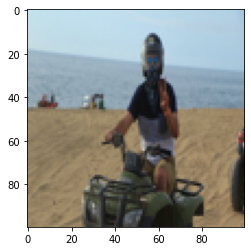

In [144]:
plt.imshow(test_image)

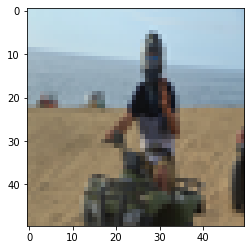

In [145]:
plt.imshow(test_image_small)

In [22]:
# set black out areas for problem 1
img_reshape[15:24,10:30,0] = 0 
img_reshape[15:24,10:30,1] = 0 
img_reshape[15:24,10:30,2] = 0 

img_reshape[40:59,80:83,0] = 0 
img_reshape[40:59,80:83,1] = 0 
img_reshape[40:59,80:83,2] = 0 

img_reshape[38:56,4:15,0] = 0 
img_reshape[38:56,4:15,1] = 0 
img_reshape[38:56,4:15,2] = 0 

10000

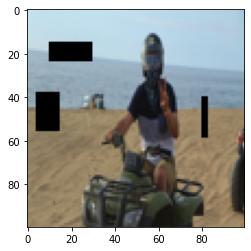

In [23]:
plt.imshow(img_reshape)
img_reshape.shape[0] * img_reshape.shape[1]

In [101]:
# take the image and the n and d parameters from the paper
# return the imputed image where all values RGB are 0 and the original image given
def networks_fill(img, drop_off, pix_neighbors):
    # first define nodes to guess
    # initalize to 0
    x_unknown = []
    y_unknown = []
    # get size of image
    size = img.shape[0] * img.shape[1]
    # create copys of images
    img_reshape = img.copy()
    img_copy = img_reshape.copy()
    # loop through each pixel in image
    for (x_y_pix,val) in np.ndenumerate(img_reshape):
        # if all values (RGB) are null (totally black)
        if val == 0:
            # add these node locations to unknown nodes
            x_unknown.append(x_y_pix[0])
            y_unknown.append(x_y_pix[1])

    # get img width and reshame the unknown nodes to single dataframe with no duplicates
    width = img_reshape.shape[1]
    unknown = pd.concat((pd.DataFrame(x_unknown).rename(columns={0: 'x'}),
                             pd.DataFrame(y_unknown).rename(columns={0: 'y'})),
                            axis=1).drop_duplicates()

    # call the get adjecency matrix to get adj matrix with set d drop off
    A = get_adj_matrix(img,drop_off)
    # call the standardize matrix on the adj depth matrix which gives the adj matrix updated
    # for all the neighbors specified in funciont (normalized between 0-1)
    B = std_matrix(adj_depth(A, pix_neighbors))
    
    
    # loop though unknown nodes and impute
    for index, row in tqdm(unknown.iterrows(),total=(unknown.size/2)):
        # get the pixal infomration
        pix_num = row[1] + (row[0]*width)
        
        # drop rows in adjececny matrix where the nodes are also blacked out
        # ie dont use blacked out nodes to guess black if they in network for imputation
        for i in range(len(img_reshape[:,:,0].ravel().reshape(size,1))):
            if img_reshape[:,:,0].ravel().reshape(size,1)[i] == 0:
                B[pix_num,i] = 0
        
        # standardixe matrix again
        reduced_adj_mat = std_matrix(B)
        # multiply the weights times the RGB values respectivly
        r_val = reduced_adj_mat[pix_num] * img_reshape[:,:,0].ravel().reshape(size,1)
        g_val = reduced_adj_mat[pix_num] * img_reshape[:,:,1].ravel().reshape(size,1)
        b_val = reduced_adj_mat[pix_num] * img_reshape[:,:,2].ravel().reshape(size,1)
    
        # set image copy pixels as those imputed RGB values
        img_copy[row[0],row[1],0] = r_val[0,0]
        img_copy[row[0],row[1],1] = g_val[0,0]
        img_copy[row[0],row[1],2] = b_val[0,0]
        
    return(img, img_copy)

In [25]:
input_img, output_img = networks_fill(img_reshape, 0.5, 7)

0
1
2
3
4
5
6


100%|██████████| 435/435.0 [08:24<00:00,  1.16s/it]


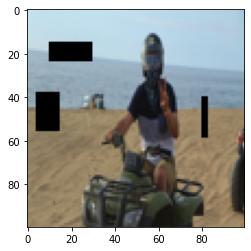

In [26]:
plt.imshow(input_img)

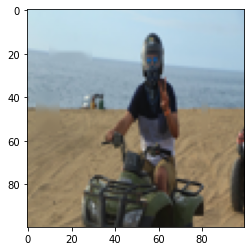

In [27]:
plt.imshow(output_img)

In [28]:
# linear regression approach (baseline)
def lin_image_fill(img):
    # first define pixel to guess
    # initalize to 0
    x_unknown = []
    y_unknown = []
    # create copys of images
    img_reshape_test = img.copy()
    img_reshape2 = img_reshape_test.copy()
    # loop through each pixel in image
    for (x_y_pix,val) in np.ndenumerate(img_reshape_test):
        # if all values (RGB) are null (totally black)
        if val == 0:
            # add these pixel locations to unknown nodes
            x_unknown.append(x_y_pix[0])
            y_unknown.append(x_y_pix[1])
            
    # reshame the unknown pixels to single dataframe with no duplicates
    unknown = pd.concat((pd.DataFrame(x_unknown).rename(columns={0: 'x'}),
                         pd.DataFrame(y_unknown).rename(columns={0: 'y'})),
                        axis=1).drop_duplicates()

    # loop though unknown pixels and impute
    for index, row in tqdm(unknown.iterrows(),total=(unknown.size/2)):
        # print(row['x'], row['y'])
        # set the inputs and outputs to RGB values for both horizonal and vertical directions
        x_r_hor = pd.Series(range(0,len(img_reshape_test[row['x'],:,0])))
        y_r_hor = pd.Series(img_reshape_test[row['x'],:,0])
        x_g_hor = pd.Series(range(0,len(img_reshape_test[row['x'],:,1])))
        y_g_hor = pd.Series(img_reshape_test[row['x'],:,1])
        x_b_hor = pd.Series(range(0,len(img_reshape_test[row['x'],:,2])))
        y_b_hor = pd.Series(img_reshape_test[row['x'],:,2])
    
        x_r_ver = pd.Series(range(0,len(img_reshape_test[:,row['y'],0])))
        y_r_ver = pd.Series(img_reshape_test[:,row['y'],0])
        x_g_ver = pd.Series(range(0,len(img_reshape_test[:,row['y'],1])))
        y_g_ver = pd.Series(img_reshape_test[:,row['y'],1])
        x_b_ver = pd.Series(range(0,len(img_reshape_test[:,row['y'],2])))
        y_b_ver = pd.Series(img_reshape_test[:,row['y'],2])
    
        df_r_hor = pd.DataFrame(pd.concat((x_r_hor, y_r_hor), axis=1))
        inputs_r_hor = df_r_hor.loc[df_r_hor[1] > 0]
        outputs_r_hor = df_r_hor.loc[df_r_hor[1] == 0]
        df_g_hor = pd.DataFrame(pd.concat((x_g_hor, y_g_hor), axis=1))
        inputs_g_hor = df_g_hor.loc[df_g_hor[1] > 0]
        outputs_g_hor = df_g_hor.loc[df_g_hor[1] == 0]
        df_b_hor = pd.DataFrame(pd.concat((x_b_hor, y_b_hor), axis=1))
        inputs_b_hor = df_b_hor.loc[df_b_hor[1] > 0]
        outputs_b_hor = df_b_hor.loc[df_b_hor[1] == 0]
    
        df_r_ver = pd.DataFrame(pd.concat((x_r_ver, y_r_ver), axis=1))
        inputs_r_ver = df_r_ver.loc[df_r_ver[1] > 0]
        outputs_r_ver = df_r_ver.loc[df_r_ver[1] == 0]
        df_g_ver = pd.DataFrame(pd.concat((x_g_ver, y_g_ver), axis=1))
        inputs_g_ver = df_g_ver.loc[df_g_ver[1] > 0]
        outputs_g_ver = df_g_ver.loc[df_g_ver[1] == 0]
        df_b_ver = pd.DataFrame(pd.concat((x_b_ver, y_b_ver), axis=1))
        inputs_b_ver = df_b_ver.loc[df_b_ver[1] > 0]
        outputs_b_ver = df_b_ver.loc[df_b_ver[1] == 0]
    
        # make linear models for each color RGB and the two directions horizontal/vertical
        model_r_hor = linear_model.LinearRegression().fit(np.array(inputs_r_hor[0]).reshape(-1, 1), np.array(inputs_r_hor[1]))
        model_g_hor = linear_model.LinearRegression().fit(np.array(inputs_g_hor[0]).reshape(-1, 1), np.array(inputs_g_hor[1]))
        model_b_hor = linear_model.LinearRegression().fit(np.array(inputs_b_hor[0]).reshape(-1, 1), np.array(inputs_b_hor[1]))
    
        model_r_ver = linear_model.LinearRegression().fit(np.array(inputs_r_ver[0]).reshape(-1, 1), np.array(inputs_r_ver[1]))
        model_g_ver = linear_model.LinearRegression().fit(np.array(inputs_g_ver[0]).reshape(-1, 1), np.array(inputs_g_ver[1]))
        model_b_ver = linear_model.LinearRegression().fit(np.array(inputs_b_ver[0]).reshape(-1, 1), np.array(inputs_b_ver[1]))
    
        # make predictions for each color in both directions
        pred_r_hor = model_r_hor.predict(np.array(row['y']).reshape(-1, 1))
        pred_g_hor = model_g_hor.predict(np.array(row['y']).reshape(-1, 1))
        pred_b_hor = model_b_hor.predict(np.array(row['y']).reshape(-1, 1))
    
        pred_r_ver = model_r_ver.predict(np.array(row['x']).reshape(-1, 1))
        pred_g_ver = model_g_ver.predict(np.array(row['x']).reshape(-1, 1))
        pred_b_ver = model_b_ver.predict(np.array(row['x']).reshape(-1, 1))

        # set copy images pixels to the mean of the vertical and horizontal guesses of each color
        img_reshape2[row['x'],row['y'],0] = statistics.mean([pred_r_hor[0],pred_r_ver[0]])
        img_reshape2[row['x'],row['y'],1] = statistics.mean([pred_g_hor[0],pred_g_ver[0]])
        img_reshape2[row['x'],row['y'],2] = statistics.mean([pred_b_hor[0],pred_b_ver[0]])

    # return the input image and the output image
    return img, img_reshape2

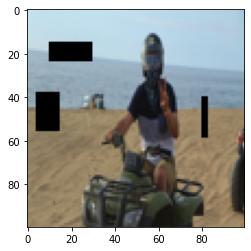

In [38]:
plt.imshow(img_reshape)

In [30]:
input_img_2, output_img_2 = lin_image_fill(img_reshape)

100%|██████████| 435/435.0 [00:12<00:00, 34.45it/s]


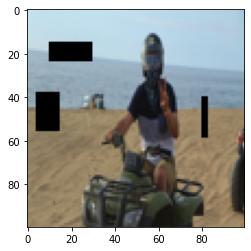

In [31]:
plt.imshow(input_img_2)

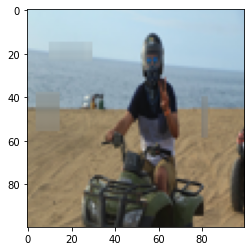

In [32]:
plt.imshow(output_img_2)

In [71]:
# print the difference in pixel valuees between orignal image vs the blacked image, 
# and the original image and the predicted image
def goodness_of_pixels(og_img, blacked_img, guessed_img):
    # absolute difference in RGB values for og vs blacked
    r_diff_noguess = (abs(og_img[:,:,0] - blacked_img[:,:,0])).sum()
    g_diff_noguess = (abs(og_img[:,:,1] - blacked_img[:,:,1])).sum()
    b_diff_noguess = (abs(og_img[:,:,1] - blacked_img[:,:,2])).sum()
    #print(r_diff_noguess,g_diff_noguess,b_diff_noguess)
    diff_noguess = r_diff_noguess+g_diff_noguess+b_diff_noguess
    print(diff_noguess)
    
    # absolute difference in RGB values for og vs guessed
    r_diff_guess = (abs(og_img[:,:,0] - guessed_img[:,:,0]*255)).sum()
    g_diff_guess = (abs(og_img[:,:,1] - guessed_img[:,:,1]*255)).sum()
    b_diff_guess = (abs(og_img[:,:,1] - guessed_img[:,:,2]*255)).sum()
    #print(r_diff_guess,g_diff_guess,b_diff_guess)
    diff_guess = r_diff_guess+g_diff_guess+b_diff_guess
    print(diff_guess)
    
    return ((diff_noguess-diff_guess)/diff_noguess)

In [72]:
goodness_of_pixels(test_image, img_reshape, output_img)

4082578.6274509802
200965.3168287254


0.9507749059681427

In [73]:
goodness_of_pixels(test_image, img_reshape, output_img_2)

4082578.6274509802
201689.27287515087


0.9505975778349973

In [84]:
# create copy of image for problem 2
rand_drop_img = test_image.copy()
# set seed adn randomly drop 50% of dataset
random.seed(420)
to_be_or_not_to_be = np.random.randint(2, size=(rand_drop_img.shape[0],rand_drop_img.shape[1]))
rand_drop_img[:,:,0] = test_image[:,:,0] * to_be_or_not_to_be
rand_drop_img[:,:,1] = test_image[:,:,1] * to_be_or_not_to_be
rand_drop_img[:,:,2] = test_image[:,:,2] * to_be_or_not_to_be

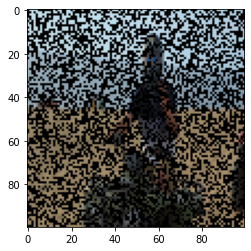

In [86]:
plt.imshow(rand_drop_img)

In [88]:
input_img_2_rand, output_img_2_rand = lin_image_fill(rand_drop_img)

100%|██████████| 4981/4981.0 [01:25<00:00, 58.18it/s]


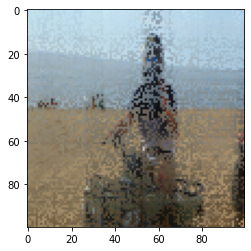

In [91]:
plt.imshow(output_img_2_rand)

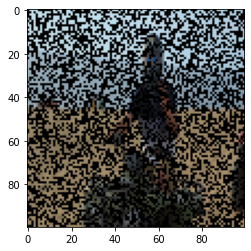

In [98]:
plt.imshow(rand_drop_img)

In [102]:
# input_img_rand, output_img_rand = networks_fill(rand_drop_img, 0.5, 7)


0
1
2
3
4
5
6


100%|██████████| 4981/4981.0 [1:44:33<00:00,  1.26s/it]  


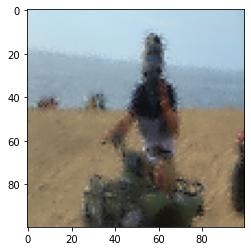

In [103]:
plt.imshow(output_img_rand)


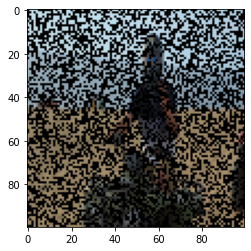

In [96]:
plt.imshow(input_img_rand)



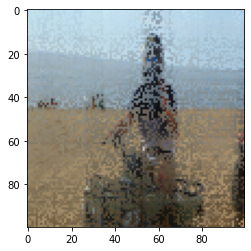

In [104]:
plt.imshow(output_img_2_rand)

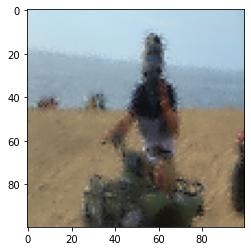

In [105]:
plt.imshow(output_img_rand)



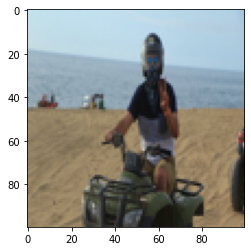

In [106]:
plt.imshow(test_image)

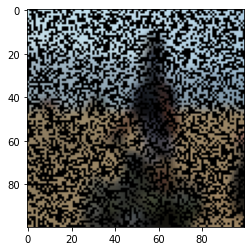

In [114]:
helper = output_img_rand - input_img_rand
plt.imshow(helper)

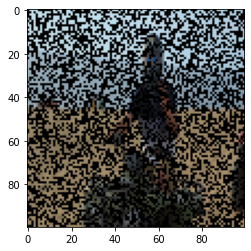

In [117]:
plt.imshow(input_img_rand)



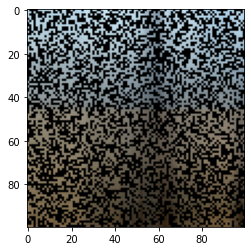

In [116]:
helper2 = output_img_2_rand - input_img_rand
plt.imshow(helper2)

In [135]:
def goodness_of_pixels2(og_img, blacked_img, guessed_img):
    r_diff_noguess = (abs(og_img[:,:,0] - blacked_img[:,:,0])).sum()
    g_diff_noguess = (abs(og_img[:,:,1] - blacked_img[:,:,1])).sum()
    b_diff_noguess = (abs(og_img[:,:,1] - blacked_img[:,:,2])).sum()
    #print(r_diff_noguess,g_diff_noguess,b_diff_noguess)
    diff_noguess = r_diff_noguess+g_diff_noguess+b_diff_noguess
    print(diff_noguess)
    
    r_diff_guess = (abs(og_img[:,:,0] - guessed_img[:,:,0])).sum()
    g_diff_guess = (abs(og_img[:,:,1] - guessed_img[:,:,1])).sum()
    b_diff_guess = (abs(og_img[:,:,1] - guessed_img[:,:,2])).sum()
#     print(r_diff_guess,g_diff_guess,b_diff_guess)
    diff_guess = r_diff_guess+g_diff_guess+b_diff_guess
    print(diff_guess)
    
    return ((diff_noguess-diff_guess)/diff_noguess)

In [136]:
goodness_of_pixels2(test_image, input_img_rand, output_img_rand)

2704169
2260122


0.16420830206987802

In [137]:
goodness_of_pixels2(test_image, input_img_rand, output_img_2_rand)

2704169
2107729


0.22056313788080553

(50, 50, 3)


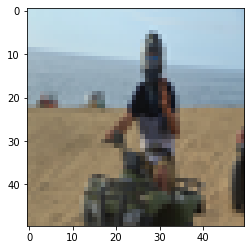

In [147]:
plt.imshow(test_image_small)
print(test_image_small.shape)

(100, 100, 3)


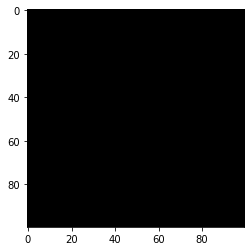

In [154]:
blank = np.random.randint(1, size=(test_image_small.shape[0]*2,test_image_small.shape[1]*2,test_image_small.shape[2]))
plt.imshow(blank)
print(blank.shape)

In [167]:
blank_fin = blank.copy()
for (x_y_pix,val) in np.ndenumerate(blank):
    row_num = x_y_pix[0]
    col_num = x_y_pix[1]
    col_indic = x_y_pix[2]
    if(row_num%2==0 and col_num%2==0):
        blank_fin[row_num, col_num, 0] = test_image_small[int(row_num/2),int(col_num/2),0]
        blank_fin[row_num, col_num, 1] = test_image_small[int(row_num/2),int(col_num/2),1]
        blank_fin[row_num, col_num, 2] = test_image_small[int(row_num/2),int(col_num/2),2]

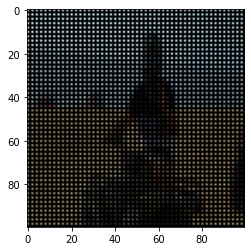

In [168]:
plt.imshow(blank_fin)

In [169]:
input_img_rand_blank, output_img_rand_blank = networks_fill(blank_fin, 0.5, 7)



0
1
2
3
4
5
6


100%|██████████| 7500/7500.0 [2:37:18<00:00,  1.26s/it]   


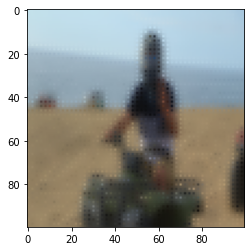

In [203]:
plt.imshow(output_img_rand_blank)

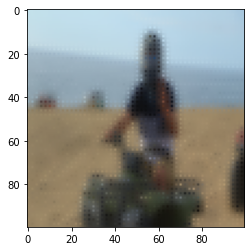

In [171]:
plt.imshow(output_img_rand_blank)

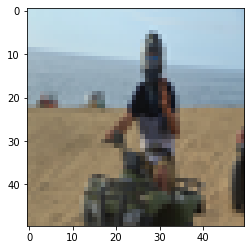

In [172]:
plt.imshow(test_image_small)

0
1
2
3
4
5
6


100%|██████████| 4981/4981.0 [1:47:33<00:00,  1.30s/it]  


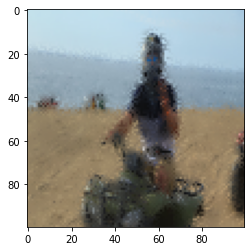

In [173]:
input_img_rand_a, output_img_rand_a = networks_fill(rand_drop_img, 0.9, 7)
plt.imshow(output_img_rand_a)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


100%|██████████| 4981/4981.0 [1:44:51<00:00,  1.26s/it]  


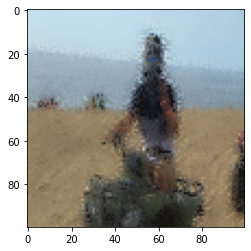

In [174]:
input_img_rand_b, output_img_rand_b = networks_fill(rand_drop_img, 0.5, 16)
plt.imshow(output_img_rand_b)

0
1
2
3
4
5
6


100%|██████████| 4981/4981.0 [1:46:25<00:00,  1.28s/it]  


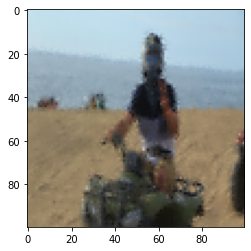

In [175]:
input_img_rand_c, output_img_rand_c = networks_fill(rand_drop_img, 0.2, 7)
plt.imshow(output_img_rand_c)

0
1
2


100%|██████████| 4981/4981.0 [1:51:06<00:00,  1.34s/it]  


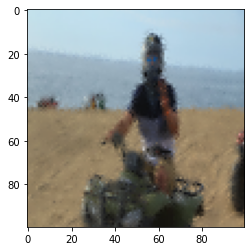

In [176]:
input_img_rand_d, output_img_rand_d = networks_fill(rand_drop_img, 0.5, 3)
plt.imshow(output_img_rand_d)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


100%|██████████| 4981/4981.0 [2:03:30<00:00,  1.49s/it]  


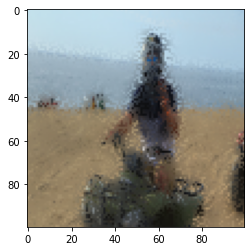

In [177]:
input_img_rand_e, output_img_rand_e = networks_fill(rand_drop_img, 0.9, 16)
plt.imshow(output_img_rand_e)

0
1
2


100%|██████████| 4981/4981.0 [2:27:50<00:00,  1.78s/it]   


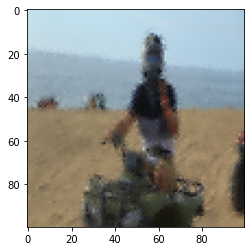

In [178]:
input_img_rand_f, output_img_rand_f = networks_fill(rand_drop_img, 0.9, 3)
plt.imshow(output_img_rand_f)

0
1
2


100%|██████████| 4981/4981.0 [1:50:15<00:00,  1.33s/it]  


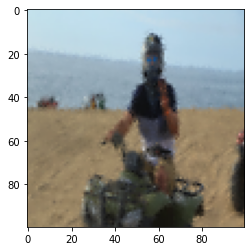

In [179]:
input_img_rand_g, output_img_rand_g = networks_fill(rand_drop_img, 0.2, 3)
plt.imshow(output_img_rand_g)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


100%|██████████| 4981/4981.0 [1:54:27<00:00,  1.38s/it]  


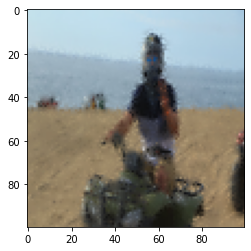

In [180]:
input_img_rand_h, output_img_rand_h = networks_fill(rand_drop_img, 0.2, 16)
plt.imshow(output_img_rand_h)

In [190]:
Image.fromarray(output_img_rand_a, 'RGB').save("./img_rand_0.9_7.png")
Image.fromarray(output_img_rand_b, 'RGB').save("./img_rand_0.5_16.png")
Image.fromarray(output_img_rand_c, 'RGB').save("./img_rand_0.2_7.png")
Image.fromarray(output_img_rand_d, 'RGB').save("./img_rand_0.5_3.png")
Image.fromarray(output_img_rand_e, 'RGB').save("./img_rand_0.9_16.png")
Image.fromarray(output_img_rand_f, 'RGB').save("./img_rand_0.9_3.png")
Image.fromarray(output_img_rand_g, 'RGB').save("./img_rand_0.2_3.png")
Image.fromarray(output_img_rand_h, 'RGB').save("./img_rand_0.2_16.png")
Image.fromarray(output_img_rand, 'RGB').save("./img_rand_0.5_7.png")

In [191]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_a)

2704169
2265874


0.1620812160778413

In [195]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_b)

2704169
2282028


0.1561074770104975

In [196]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_c)

2704169
2234642


0.17363079008745386

In [197]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_d)

2704169
2240671


0.17140126966916638

In [198]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_e)

2704169
2285703


0.15474846431565484

In [199]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_f)

2704169
2243337


0.17041538454142474

In [200]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_g)

2704169
2225505


0.17700964695623683

In [201]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand_h)

2704169
2242598


0.17068866627788426

In [202]:
goodness_of_pixels2(test_image, rand_drop_img, output_img_rand)

2704169
2260122


0.16420830206987802

In [204]:
input_img_rand_blank_g, output_img_rand_blank_g = networks_fill(blank_fin, 0.2, 3)


0
1
2


100%|██████████| 7500/7500.0 [2:50:56<00:00,  1.37s/it]  


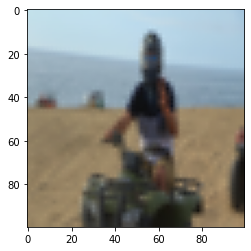

In [205]:
plt.imshow(output_img_rand_blank_g)

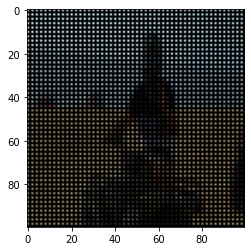

In [207]:
plt.imshow(input_img_rand_blank_g)

In [208]:
goodness_of_pixels2(test_image, input_img_rand_blank_g, output_img_rand_blank_g)

3147266
338511


0.8924428376883301

In [209]:
Image.fromarray(output_img_rand_blank_g, 'RGB').save("./img_enhance_0.2_3.png")